In [1]:
!mkdir ~/.keras
!mkdir ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

The syntax of the command is incorrect.
The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util.montage import montage2d
from skimage.io import imread
base_dir = os.path.join('D:/Neural Network/','input', 'pulmonary-chest-xray-abnormalities')

In [3]:
mont_paths = glob(os.path.join(base_dir, 'Montgomery', 'MontgomerySet', '*', '*.*'))
shen_paths = glob(os.path.join(base_dir, 'ChinaSet_AllFiles', 'ChinaSet_AllFiles', '*', '*.*'))
print('Montgomery Files', len(mont_paths))
print('Shenzhen Files', len(shen_paths))
all_paths_df = pd.DataFrame(dict(path = mont_paths + shen_paths))
all_paths_df['source'] = all_paths_df['path'].map(lambda x: x.split('/')[2])
all_paths_df['file_id'] = all_paths_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
all_paths_df['patient_group']  = all_paths_df['file_id'].map(lambda x: x.split('_')[0])

all_paths_df['file_ext'] = all_paths_df['path'].map(lambda x: os.path.splitext(x)[1][1:])
all_paths_df = all_paths_df[all_paths_df.file_ext.isin(['png', 'txt'])]
all_paths_df['pulm_state']  = all_paths_df['file_id'].map(lambda x: int(x.split('_')[-1]))
all_paths_df.sample(5)

Montgomery Files 277
Shenzhen Files 1325


,path,source,file_id,patient_group,file_ext,pulm_state
938,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0662_1,CHNCXR,txt,1
1173,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0235_0,CHNCXR,png,0
686,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0410_1,CHNCXR,txt,1
885,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0609_1,CHNCXR,txt,1
1313,D:/Neural Network/input\pulmonary-chest-xray-a...,input\pulmonary-chest-xray-abnormalities\China...,CHNCXR_0375_1,CHNCXR,png,1


In [4]:
clean_patients_df = all_paths_df.pivot_table(index = ['patient_group', 'pulm_state', 'file_id'], 
                                             columns=['file_ext'], 
                                             values = 'path', aggfunc='first').reset_index()
clean_patients_df.sample(5)
from warnings import warn
def report_to_dict(in_path):
    with open(in_path, 'r') as f:
        all_lines = [x.strip() for x in f.read().split('\n')]
    info_dict = {}
    try:
        if "Patient's Sex" in all_lines[0]:
            info_dict['age'] = all_lines[1].split(':')[-1].strip().replace('Y', '')
            info_dict['sex'] = all_lines[0].split(':')[-1].strip()
            info_dict['report'] = ' '.join(all_lines[2:]).strip()
        else:
            info_dict['age'] = all_lines[0].split(' ')[-1].replace('yrs', '').replace('yr', '')
            info_dict['sex'] = all_lines[0].split(' ')[0].strip()
            info_dict['report'] = ' '.join(all_lines[1:]).strip()
        
        info_dict['sex'] = info_dict['sex'].upper().replace('FEMALE', 'F').replace('MALE', 'M').replace('FEMAL', 'F')[0:1]
        if 'month' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        if 'day' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        elif len(info_dict.get('age',''))>0:
            info_dict['age'] = float(info_dict['age'])
        else:
            info_dict.pop('age')
        return info_dict
    except Exception as e:
        print(all_lines)
        warn(str(e), RuntimeWarning)
        return {}
report_df = pd.DataFrame([dict(**report_to_dict(c_row.pop('txt')), **c_row) 
              for  _, c_row in clean_patients_df.iterrows()])
report_df.sample(5)

['male 16month', 'normal']
['male 16month', 'normal']
['female24yrs', 'normal']


C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: 'age'
C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: 'female24'


['male35yrs', 'PTB in the left upper field']
['male35yrs', 'Bilateral secondary PTB']
['Male , 38yrs,', 'secondary PTB in the bilateral upper and middle fields, mainly fibrous  lesions']


C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: 'male35'
C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: could not convert string to float: '38,'


,age,file_id,patient_group,png,pulm_state,report,sex
412,20.0,CHNCXR_0413_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,PTB in the right upper field,F
464,24.0,CHNCXR_0465_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,Bilateral secondary PTB,M
298,5.0,CHNCXR_0299_0,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,0,normal,F
109,42.0,CHNCXR_0110_0,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,0,normal,M
782,16.0,MCUCXR_0316_1,MCUCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,improved LUL infiltrate and cavity. Active TB ...,M


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E7A3386D8>,
      dtype=object)

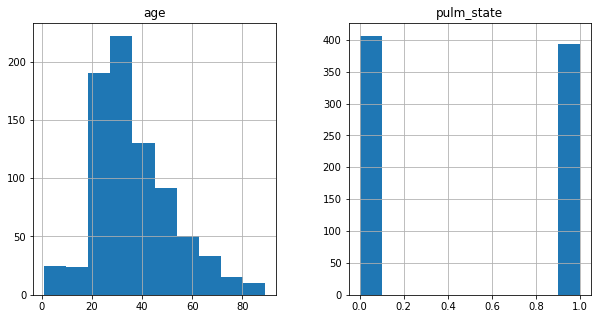

In [5]:
report_df[['age', 'patient_group', 'pulm_state', 'sex']].hist(figsize = (10, 5))

In [6]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(report_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = report_df[['pulm_state', 'patient_group']])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
raw_train_df.sample(1)

train 600 validation 200


,age,file_id,patient_group,png,pulm_state,report,sex
442,36.0,CHNCXR_0443_1,CHNCXR,D:/Neural Network/input\pulmonary-chest-xray-a...,1,right upper PTB,M


New Data Size: 800 Old Size: 600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E7B6B1898>]],
      dtype=object)

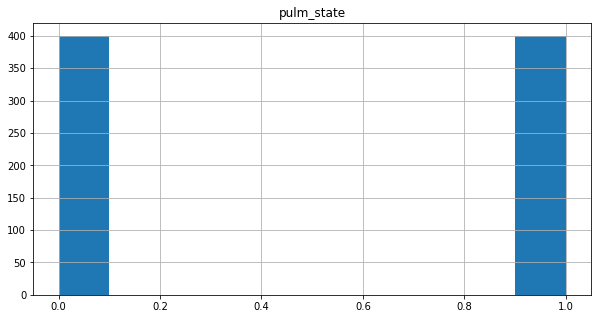

In [7]:
train_df = raw_train_df.groupby(['pulm_state', 'patient_group']).apply(lambda x: x.sample(200, replace = True)
                                                      ).reset_index(drop = True)
print('New Data Size:', train_df.shape[0], 'Old Size:', raw_train_df.shape[0])
train_df[['pulm_state', 'patient_group']].hist(figsize = (10, 5))

In [8]:
import tensorflow as tf
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
import numpy as np
IMG_SIZE = (512, 512) # slightly smaller than vgg16 normally expects
def tf_image_loader(out_size, 
                      horizontal_flip = True, 
                      vertical_flip = False, 
                     random_brightness = True,
                     random_contrast = True,
                      color_mode = 'rgb',
                       preproc_func = preprocess_input,
                       on_batch = False):
    def _func(X):
        with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_png(tf.read_file(X), channels = 3 if color_mode == 'rgb' else 0)
                X = tf.image.resize_images(X, out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.1)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.5, upper = 2.0)
                return preproc_func(X)
    if on_batch: 
        # we are meant to use it on a batch
        def _batch_func(X, y):
            return tf.map_fn(_func, X), y
        return _batch_func
    else:
        # we apply it to everything
        def _all_func(X, y):
            return _func(X), y         
        return _all_func
    
def tf_augmentor(out_size,
                intermediate_size = (768, 768),
                 batch_size = 16,
                   horizontal_flip = True, 
                  vertical_flip = False, 
                 random_brightness = True,
                 random_contrast = True,
                  color_mode = 'rgb',
                   preproc_func = preprocess_input,
                   min_crop_percent = 0.001,
                   max_crop_percent = 0.005,
                   crop_probability = 0.5,
                   rotation_range = 5):
    
    load_ops = tf_image_loader(out_size = intermediate_size, 
                               horizontal_flip=horizontal_flip, 
                               vertical_flip=vertical_flip, 
                               random_brightness = random_brightness,
                               random_contrast = random_contrast,
                               color_mode = color_mode,
                               preproc_func = preproc_func,
                               on_batch=False)
    def batch_ops(X, y):
        batch_size = tf.shape(X)[0]
        with tf.name_scope('transformation'):
            # code borrowed from https://becominghuman.ai/data-augmentation-on-gpu-in-tensorflow-13d14ecf2b19
            # The list of affine transformations that our image will go under.
            # Every element is Nx8 tensor, where N is a batch size.
            transforms = []
            identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
            if rotation_range > 0:
                angle_rad = rotation_range / 180 * np.pi
                angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
                transforms += [tf.contrib.image.angles_to_projective_transforms(angles, intermediate_size[0], intermediate_size[1])]
                
            if crop_probability > 0:
                crop_pct = tf.random_uniform([batch_size], min_crop_percent, max_crop_percent)
                left = tf.random_uniform([batch_size], 0, intermediate_size[0] * (1.0 - crop_pct))
                top = tf.random_uniform([batch_size], 0, intermediate_size[1] * (1.0 - crop_pct))
                crop_transform = tf.stack([
                      crop_pct,
                      tf.zeros([batch_size]), top,
                      tf.zeros([batch_size]), crop_pct, left,
                      tf.zeros([batch_size]),
                      tf.zeros([batch_size])
                  ], 1)
                coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), crop_probability)
                transforms += [tf.where(coin, crop_transform, tf.tile(tf.expand_dims(identity, 0), [batch_size, 1]))]
            if len(transforms)>0:
                X = tf.contrib.image.transform(X,
                      tf.contrib.image.compose_transforms(*transforms),
                      interpolation='BILINEAR') # or 'NEAREST'
            X = tf.image.resize_images(X, out_size)
            return X, y
    def _create_pipeline(in_ds):
        batch_ds = in_ds.map(load_ops, num_parallel_calls=4).batch(batch_size)
        return batch_ds.map(batch_ops)
    return _create_pipeline

C:\Users\mkahs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
def flow_from_dataframe(idg, 
                        in_df, 
                        path_col,
                        y_col, 
                        batch_size=128, 
                        shuffle = True, 
                        color_mode = 'rgb'):
    files_ds = tf.data.Dataset.from_tensor_slices((in_df[path_col].values, in_df[y_col].values))
    in_len = in_df[path_col].values.shape[0]
    while True:
        if shuffle:
            files_ds = files_ds.shuffle(in_len) # shuffle the whole dataset
        
        next_batch = idg(files_ds).repeat().make_one_shot_iterator().get_next()
        if batch_size>=in_len:
            yield K.get_session().run(next_batch)
        else:
            for i in range(in_len//batch_size):
                # NOTE: if we loop here it is 'thread-safe-ish' if we loop on the outside it is completely unsafe
                yield K.get_session().run(next_batch)

In [11]:
core_idg = tf_augmentor(out_size = IMG_SIZE, color_mode = 'rgb', crop_probability=0.0) # crop doesn't work yet
valid_idg = tf_augmentor(out_size = IMG_SIZE, color_mode = 'rgb', 
                         crop_probability=0.0, 
                         horizontal_flip = False, 
                         vertical_flip = False, 
                         random_brightness = False,
                         random_contrast = False,
                         rotation_range = 0)
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                            batch_size = 16)

valid_gen = flow_from_dataframe(valid_idg, valid_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(valid_idg, 
                               valid_df, 
                             path_col = 'png',
                            y_col = 'pulm_state', 
                             color_mode = 'rgb',
                            batch_size = valid_df.shape[0])) # one big batch

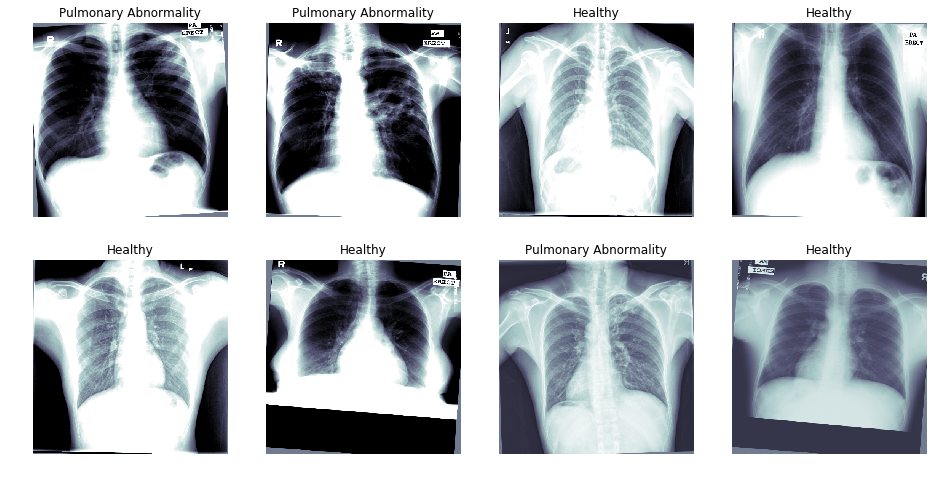

In [12]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % ('Pulmonary Abnormality' if c_y>0.5 else 'Healthy'))
    c_ax.axis('off')

In [14]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
base_pretrained_model = VGG16(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                                kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)
tb_model = Model(inputs = [in_lay], outputs = [out_layer])

tb_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

tb_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 16, 16, 512)  14714688    input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 16, 16, 512)  2048        vgg16[1][0]                      
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 16, 16, 64)   32832       batch_normalization_2[0][0]      
__________________________________________________________________________________________________
conv2d_6 (

In [62]:
!rm -rf ~/.keras # clean up the model / make space for other things

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('tb_detector')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

C:\Users\mkahs\Anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [16]:
tb_model.fit_generator(train_gen,
                      steps_per_epoch = train_df.shape[0]//16,
                      validation_data = (test_X, test_Y), 
                      epochs = 20, 
                      callbacks = callbacks_list,
                      max_queue_size=0, 
                       workers = 0, # TF-generators are very thread-unsafe
                       use_multiprocessing=False)

Epoch 1/20
50/50 [==============================] - 2111s 42s/step - loss: 0.5488 - binary_accuracy: 0.7250 - val_loss: 0.4892 - val_binary_accuracy: 0.6875

Epoch 00001: val_loss improved from inf to 0.48921, saving model to tb_detector_weights.best.hdf5
Epoch 2/20
50/50 [==============================] - 2083s 42s/step - loss: 0.3820 - binary_accuracy: 0.8325 - val_loss: 0.4085 - val_binary_accuracy: 0.7500

Epoch 00002: val_loss improved from 0.48921 to 0.40850, saving model to tb_detector_weights.best.hdf5
Epoch 3/20
50/50 [==============================] - 2063s 41s/step - loss: 0.3263 - binary_accuracy: 0.8600 - val_loss: 0.5706 - val_binary_accuracy: 0.7500

Epoch 00003: val_loss did not improve from 0.40850
Epoch 4/20
50/50 [==============================] - 2083s 42s/step - loss: 0.2637 - binary_accuracy: 0.8988 - val_loss: 0.4933 - val_binary_accuracy: 0.7500

Epoch 00004: val_loss did not improve from 0.40850
Epoch 5/20
50/50 [==============================] - 2089s 42s/step